<a href="https://colab.research.google.com/github/premonish/UltimateChallenge/blob/main/Ultimate_Interview_Challenge_%5BPrem_Ananda%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ultimate Interview Challenge**

---
#**Part 1. Exploratory Data Analysis**
---


## Directions


> The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15-minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

##Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

##Load Data

In [2]:
logins = 'https://raw.githubusercontent.com/premonish/UltimateChallenge/main/data/logins.json'
logins = pd.read_json(logins)
print(logins.head(3))
print(logins.tail(3))
print('- - - - - - - - - - - - -')
print("There are",logins.shape[0],"timestamp observations in 'logins.json'.")

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
               login_time
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23
- - - - - - - - - - - - -
There are 93142 timestamp observations in 'logins.json'.


In [3]:
print("Maximum Timestamp:", max(logins.login_time))
print("Minimum Timestamp:",min(logins.login_time))
print("Max-Min Timestamp:", max(logins.login_time)-min(logins.login_time))

Maximum Timestamp: 1970-04-13 18:57:38
Minimum Timestamp: 1970-01-01 20:12:16
Max-Min Timestamp: 101 days 22:45:22


##Transform Data

In [4]:
# create a login instance counter column
logins['counter'] = 1
# convert the date to a datetime object, and set it as the index
logins = logins.set_index(pd.to_datetime(logins['login_time'], unit='s'))[['counter']]
logins.head()

,counter
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


## Resample & Visualize Data 1: 15-Minute Intervals

In [5]:
# resample 15 minute time intervals
df_15min = logins.resample('15min').sum()

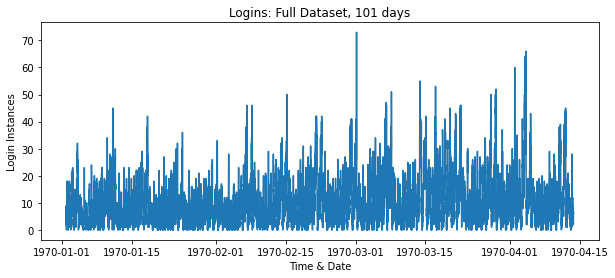

In [6]:
# scatterplot of the binned data
def plotter(x,y,label='Full Dataset, 101 days',figsize=(10,4),color='violet'):
  fig, ax = plt.subplots(figsize=figsize)
  plt.xlabel('Time & Date')
  plt.ylabel('Login Instances')
  plt.title('Logins: '+ label)
  # puts the data in the figure
  plt.plot(x,y);
plotter(df_15min.index, df_15min.counter)  

Let's zoom in as there seems to be a weekly cycle. Let's visualize login instances in a monthly view.


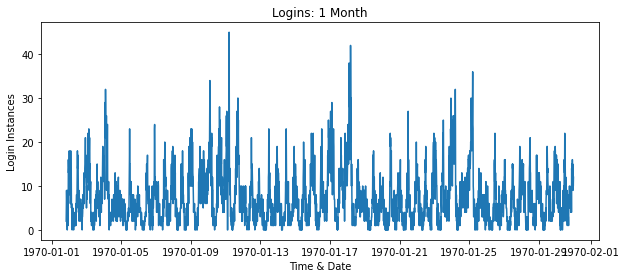

In [7]:
# Let's zoom into a month
plotter(df_15min[:2800].index, df_15min[:2800].counter, label='1 Month')  

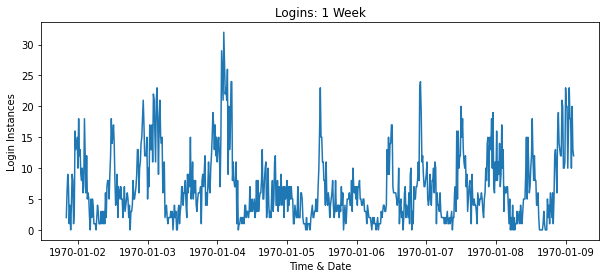

In [8]:
# Let's zoom into a week
plotter(df_15min[:700].index, df_15min[:700].counter, label='1 Week')  

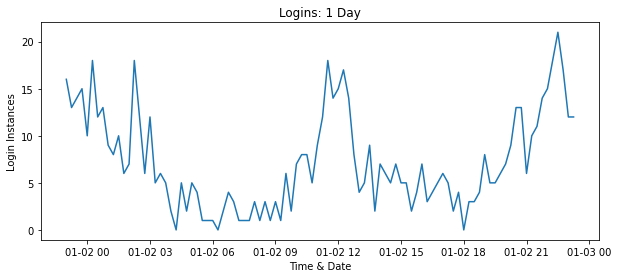

In [9]:
# Let's zoom into a day
plotter(df_15min[12:110].index, df_15min[12:110].counter, label='1 Day')  

## Resample & Visualize Data 2: Daily Intervals

In [10]:
# resample daily logins
mondays =     logins.resample('W-MON').sum()
tuesdays =    logins.resample('W-TUE').sum()
wednesdays =  logins.resample('W-WED').sum()
thursdays =   logins.resample('W-THU').sum()
fridays =     logins.resample('W-FRI').sum()
saturdays =   logins.resample('W-SAT').sum()
sundays =     logins.resample('W-SUN').sum()

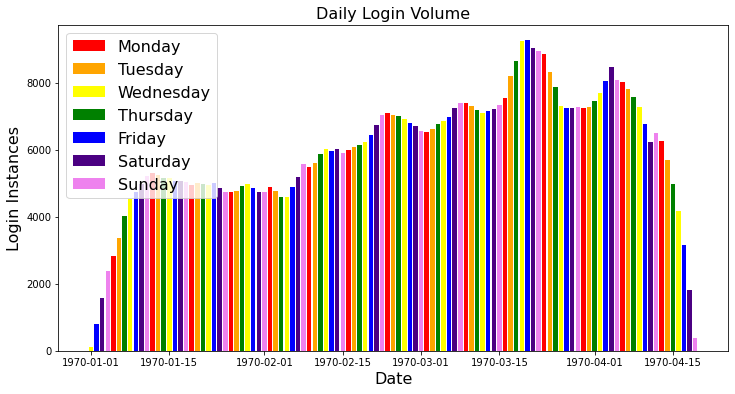

In [11]:
# plot daily logins
fig, ax = plt.subplots(figsize = (12,6))
plt.xlabel('Date',             fontsize = 16)
plt.ylabel('Login Instances', fontsize = 16)
plt.title('Daily Login Volume',  fontsize = 16)

plt.bar(mondays.index, mondays.counter,       label = "Monday",    color = 'red')
plt.bar(tuesdays.index, tuesdays.counter,     label = 'Tuesday',   color = 'orange')
plt.bar(thursdays.index, thursdays.counter,   label = "Wednesday", color = 'yellow')
plt.bar(wednesdays.index, wednesdays.counter, label = "Thursday",  color = 'green')
plt.bar(fridays.index, fridays.counter,       label = "Friday",    color = 'blue')
plt.bar(saturdays.index, saturdays.counter,   label = 'Saturday',  color = 'indigo')
plt.bar(sundays.index, sundays.counter,       label = "Sunday",    color = 'violet')

plt.legend(loc='upper left', fontsize = 16)

## Resample & Visualize Data 3: Hourly Averages

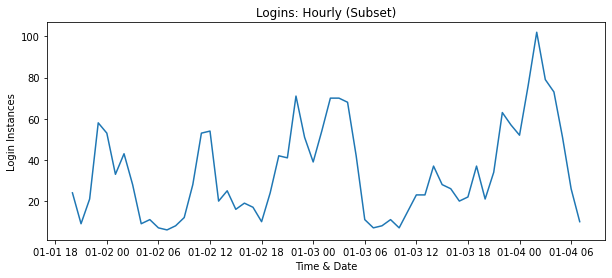

In [12]:
# resample & plot hourly data
hourly = logins.resample('H').sum()
plotter(hourly.index[:60], hourly.counter[:60], label='Hourly (Subset)')

Upon initial inspection, there appears to be a 12-hour cycle. Let's average the per hour login instances over the entire dataset and look for daily trends. 

In [13]:
# create 'day' column representing the day of the week
day = list(hourly.index.dayofweek)
hourly['day'] = day
# create an 'hour' column 
hourly['hour'] = [time.hour for time in hourly.index]

In [14]:
hourly_avg = hourly.groupby([ 'hour', 'day',])['counter'].mean()
hourly_avg = hourly_avg.unstack(level=['day'])

In [15]:
# name columns
hourly_avg.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [16]:
hourly_avg = hourly_avg.stack(level=[0])

In [17]:
hourly_avg.name = 'avg_logins'
hourly_avg = hourly_avg.reset_index()

In [18]:
hourly_avg.rename(columns={'level_1':'day'}, inplace=True)
hourly_avg

,hour,day,avg_logins
0,0,Monday,35.400000
1,0,Tuesday,43.357143
2,0,Wednesday,49.071429
3,0,Thursday,58.285714
4,0,Friday,65.000000
...,...,...,...
163,23,Wednesday,64.857143
164,23,Thursday,68.866667
165,23,Friday,86.533333
166,23,Saturday,67.066667


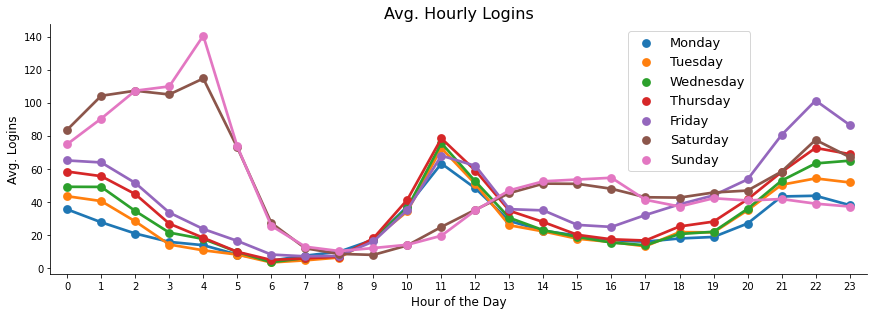

In [19]:
# plot average hourly use
sns.catplot(x='hour', y='avg_logins', data=hourly_avg, kind='point', 
            hue='day',height=4, aspect=3, legend=False)
ax = plt.gca()
ax.set_title('Avg. Hourly Logins',          fontsize = 16)
ax.set_xlabel('Hour of the Day',            fontsize = 12)
ax.set_ylabel('Avg. Logins',                     fontsize = 12)
ax.tick_params(labelsize=10, labelcolor="black")
ax.legend(bbox_to_anchor=(0.7,0.7,0.3, 0.3),     fontsize= 13);

### **OBSERVATION:** 
From the plot above, we can see that Saturday and Sunday have a similar shape over the course of a day (24-hours) on average. Weekends logins show a peak around 4 AM, perhaps related to the end of nightlife, when users may need a safe ride home. On weekdays, there are 2 login peaks, one around 11 AM and the other around 10 PM (22:00). Average weekend logins are higher than average weekday logins from the start of the day until 6 AM (00:00-06:00). 

---
#**Part 2. Experiment and Metrics Design**
---

## Directions


The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

## Responses

**1: What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?**


---

A1: I'd choose the daily average number of bridge crossings for partner drivers during an active session as the key success metric for this experiment. I'd choose this metric since we could easily compare the pre-experimental data with the experimental data and if there is a significant difference, we could assert that the toll-reimbursement program was successful. We can assume that Ultimate desires a local increase in driver availability resulting in decreased wait times and increased customer satisfaction.


**2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success.** 

---

A2: Assuming that we have trip location data for past trips, we can use the previous daily averages of bridge crossing data as our baseline metric. Our hypothesis is that Toll-Free bridge crossings will increase the daily average number of bridge crossings for active Ultimate drivers. 

a. To implement the experiment, we could offer the toll-reimbursement program to a random sample of all active Ultimate drivers in the 2 cities. Perhaps the sample represents 20% of all active drivers. We would record each individual driver's average number of bridge crossings per day in the previous 30 days. It is quite possible that the average number of bridge crossings per active driver is less than one or zero. We could run the experimental offer for 30 days and record the average daily bridge crossings for our sample group. If there is a statistically significant increase in the number of bridge crossings, we could conduct a similar experiment with a larger subset of the active driver population for greater confidence. 

**Hypothesis:** "Toll-Free" bridge crossings will increase the daily average number of bridge crossings for active Ultimate drivers.

**NULL Hypothesis:** "Toll-Free" bridge crossings will have no effect on the daily average number of bridge crossings for active Ultimate drivers.

b. We would use a one-tail T-test to verify the significance of the observation. A significant T-value would indicate that the hypothesis may be valid and could merit further experimentation with a larger subset.

**Recommendations:**
1. If the hypothesis is verified with statistical significance, we would recommend running the experiment with a larger subset.
2. We would recommend scaling up the experiment to the full population slowly.
3. The program should be scaled with the caveat that it is temporary and only available on a trial-basis.
4. The program's success metric should be constantly observed and asssessed to ensure to verify on-going success of the program.

**Caveats:**
1. The solution may not scale up well as there may be other variables when the entire local active driver population is given the toll-free offer such as competition and saturation.
2. The experiment does require more experimentation on a larger cohort to determine if there is a point of diminishing returns given the unique dynamics of the local market.
3. A detailed cost-benefit analysis should be conducted to determine if the program is practical when implemented at scale.  
---


---
#**Part 3. Predictive Modeling**
---

## Directions


Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later, we consider a user retained if they
were "active" (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long-term rider retention (again, a few sentences will suffice).

##Prepare Data

###Load Data

In [20]:
data = 'https://raw.githubusercontent.com/premonish/UltimateChallenge/main/data/ultimate_data_challenge.json'
data = pd.read_json(data)
print(data.head(3))
print(data.tail(3))
print('- - - - - - - - - - - - -')
print("There are",data.shape[0],"timestamp observations in 'ultimate_data_challenge.json'.")

             city  trips_in_first_30_days  ... avg_dist  avg_rating_by_driver
0  King's Landing                       4  ...     3.67                   5.0
1         Astapor                       0  ...     8.26                   5.0
2         Astapor                       3  ...     0.77                   5.0

[3 rows x 12 columns]
             city  trips_in_first_30_days  ... avg_dist  avg_rating_by_driver
49997  Winterfell                       0  ...     3.86                   5.0
49998     Astapor                       2  ...     4.58                   3.5
49999     Astapor                       0  ...     3.49                   5.0

[3 rows x 12 columns]
- - - - - - - - - - - - -
There are 50000 timestamp observations in 'ultimate_data_challenge.json'.


In [21]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


###Clean Data

In [23]:
# change datatypes for the timestamp columns
data.signup_date = pd.to_datetime(data.signup_date)
data.last_trip_date = pd.to_datetime(data.last_trip_date)

In [24]:
data.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [25]:
# sns.barplot(x=data.shape[0], y=data.phone)

In [26]:
data.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [28]:
# missing values must be considered. There are 50000 total entries.
total = 50000
# let's check the missing percentages
print( "avg_rating_of_driver - missing:", round((1 - data.avg_rating_of_driver.notnull().sum()/total)*100,2))      
print( "avg_rating_by_driver - missing:", round((1 - data.avg_rating_by_driver.notnull().sum()/total)*100,2))
print( "phone - missing:", round((1 - data.phone.notnull().sum()/total)*100,2))     

avg_rating_of_driver - missing: 16.24
avg_rating_by_driver - missing: 0.4
phone - missing: 0.79


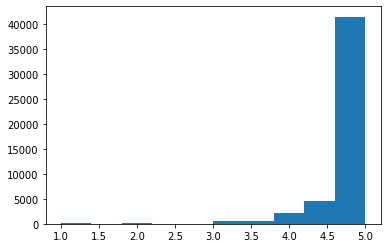

In [29]:
plt.hist(data.avg_rating_by_driver, bins=10);

We can confidently drop 0.4% of the dataset with null 'avg_rating_by_driver' values as well as the 0.79% of rows missing 'phone' values. 

16.24% of all observations are missing the 'avg_rating_of_driver'. It's not a number that can be easily imputed, as it is a personal choice. The histogram show that most users rate drivers a 5. We will drop these rows since we have more than 41,000 clean observations.

In [30]:
# drop rows w missing values
data.dropna( subset=['avg_rating_of_driver','avg_rating_by_driver','phone'], inplace=True)
data.reset_index(drop=True, inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41445 entries, 0 to 41444
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    41445 non-null  object        
 1   trips_in_first_30_days  41445 non-null  int64         
 2   signup_date             41445 non-null  datetime64[ns]
 3   avg_rating_of_driver    41445 non-null  float64       
 4   avg_surge               41445 non-null  float64       
 5   last_trip_date          41445 non-null  datetime64[ns]
 6   phone                   41445 non-null  object        
 7   surge_pct               41445 non-null  float64       
 8   ultimate_black_user     41445 non-null  bool          
 9   weekday_pct             41445 non-null  float64       
 10  avg_dist                41445 non-null  float64       
 11  avg_rating_by_driver    41445 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [32]:
print("Most recent trip data:",data.last_trip_date.max())
print("Oldest trip data:",data.last_trip_date.min())
print("Data Date Range:",data.last_trip_date.max()-data.last_trip_date.min())

Most recent trip data: 2014-07-01 00:00:00
Oldest trip data: 2014-01-01 00:00:00
Data Date Range: 181 days 00:00:00


In [33]:
print("Most recent signup_date data:",data.signup_date.max())
print("Oldest signup_date data:",data.signup_date.min())
print("Data signup_date Range:",data.signup_date.max()-data.last_trip_date.min())

Most recent signup_date data: 2014-01-31 00:00:00
Oldest signup_date data: 2014-01-01 00:00:00
Data signup_date Range: 30 days 00:00:00


In [34]:
# # create an 'acct_age' column 
# data['acct_age'] = data.last_trip_date - data.signup_date

### Create 'active' Feature as a Binary Column

In [35]:
# create target variable column 'active' and broadcast '0' as a default boolean
data['active'] = 0

In [36]:
import datetime
# create datetime object representing the start of the period of interest (30 days preceding)
x = datetime.datetime(2014, 5, 31)

# # iterate through the values of last_trip_data
for i in range(data.shape[0]):
  if data.last_trip_date[i] > x:
    data.active[i] = 1 

print("There are",data.active.sum(),"'active' users out of",data.shape[0],'users.')
print(round((data.active.sum()/data.shape[0])*100,2),"% are active users.")
print(round(data.shape[0]/total*100,2),"% of the observed users were preserved after cleaning the data.")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


There are 17035 'active' users out of 41445 users.
41.1 % are active users.
82.89 % of the observed users were preserved after cleaning the data.


## A. User Retention: What fraction of the observed users were retained?
---


 **There is 41.1% user retention. 17,035/41,445 are retained users from the cleaned dataset.**
 

CLEANING:

**82.89% of the observed users were preserved after cleaning the data.**

preserved users = 41445, 
total users  = 50000

---

## B. Build a Predictive Model 
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

### Approach

To determine if a user will be active in their 6th month in the system, we will analyze the 6 months of user data. Specifically, we will examine the relative importance of each varaible in determining whether the user was retained. We can address questions such as: With the goal of retaining users are the number of trips in the first 30 days more important than the average distance the user travels?

Since the question of retention is binary (active or not-active), we will use classification algorithms to model this problem. We will use a Random Forest Classifier and an XGBoost Classifier (Extreme Gradient Boosting) to understand feature importance. We will use accuracy as our primary performance metric.

### Preprocessing

In [37]:
# prepare categorical data for machine learning by making them indicator (dummy) variables
data = pd.get_dummies(data, columns=['city', 'phone', 'ultimate_black_user'])
data.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,0,1,0,0,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,1,0,0,1,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,1,0,0,0,1,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,0,1,0,0,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,0,0,1,1,0,1,0


In [38]:
# define our X matrix and y vector
data = data.drop(columns=['signup_date', 'last_trip_date'])
X = data.loc[:,data.columns !='active']
y = data.active 

In [39]:
# train/test split | 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [40]:
# Scale the data in preparation for machine learning
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###Model 1: XGB Classifier

In [41]:
# implement first classifier
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

####Feature Importance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


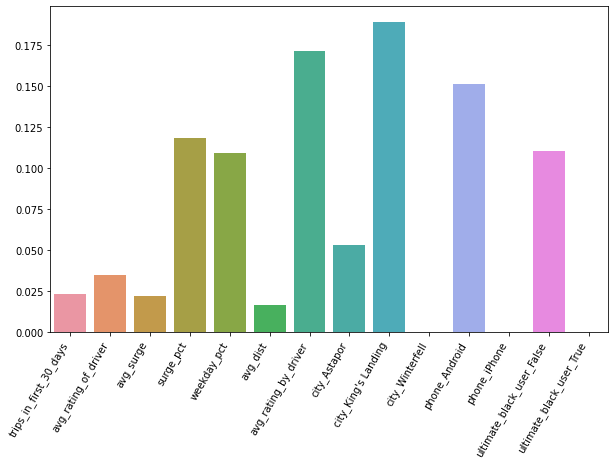

In [42]:
# FUNCTION to plot feature importance from a model
from matplotlib.pyplot import figure

values_list = []
column_names = []

def plot_import(X_train, y_train):
  
  # get importance
  importance = model.feature_importances_
  # summarize feature importance
  for i,v in enumerate(importance):
    values_list.append(v)
    column_names.append(X.columns[i])
  # plot feature importance
  ax = figure(figsize=(10, 6))
  sns.barplot([x for x in range(len(importance))], importance)
  plt.xticks(range(0,14), column_names, rotation=60, ha='right')
  plt.show()

plot_import(X_train, y_train)

In [43]:
list3 = list(zip(values_list, column_names))
importance = pd.DataFrame(list3,columns=['importance','feature'])
importance.sort_values(by=['importance'],ascending=False, inplace=True)
importance

,importance,feature
8,0.189003,city_King's Landing
6,0.171485,avg_rating_by_driver
10,0.151462,phone_Android
3,0.118543,surge_pct
12,0.110427,ultimate_black_user_False
4,0.109025,weekday_pct
7,0.052969,city_Astapor
1,0.035038,avg_rating_of_driver
0,0.023092,trips_in_first_30_days
2,0.022166,avg_surge


In [44]:
# Predicting the Test set results
y_pred = model.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[4015  808]
 [1054 2412]]


In [45]:
print('Accuracy on training set = {}'.format(model.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(model.score(X_test, y_test)))

Accuracy on training set = 0.7842321148510074
Accuracy on test set = 0.77536494148872


In [46]:
# track algorithm accuracy scores in a list
algo = []
score = []
algo.append('XGBClassifier')
score.append(model.score(X_test, y_test))

### Model 2: Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
# Predict on the test set
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[3837  986]
 [1121 2345]]


In [49]:
print('Accuracy on training set = {}'.format(model.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(model.score(X_test, y_test)))

Accuracy on training set = 0.997557003257329
Accuracy on test set = 0.745807696947762


In [50]:
# track algorithm accuracy scores in a list
algo.append('RandomForestClassifier')
score.append(model.score(X_test, y_test))

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      4823
           1       0.70      0.68      0.69      3466

    accuracy                           0.75      8289
   macro avg       0.74      0.74      0.74      8289
weighted avg       0.74      0.75      0.75      8289



###Model 3: Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 70.36


In [53]:
# track algorithm accuracy scores in a list
algo.append('LogisticRegression')
score.append(accuracy)

### Model 4: Linear SVC

In [54]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=6)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print('Accuracy on training set = {}'.format(svc.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(svc.score(X_test, y_test)))

Accuracy on training set = 0.7043069127759681
Accuracy on test set = 0.7026179273736277


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [55]:
# track algorithm accuracy scores in a list
algo.append('LinearSVC')
score.append(svc.score(X_test, y_test))

In [56]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      4823
           1       0.68      0.54      0.60      3466

    accuracy                           0.70      8289
   macro avg       0.70      0.68      0.68      8289
weighted avg       0.70      0.70      0.70      8289



In [57]:
print(confusion_matrix(y_test, y_pred_svc))

[[3965  858]
 [1607 1859]]


### Model 5: K Neighbors Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)
print('Accuracy on training set = {}'.format(knc.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(knc.score(X_test, y_test)))

Accuracy on training set = 0.8116781276390397
Accuracy on test set = 0.7283146338520932


In [59]:
# track algorithm accuracy scores in a list
algo.append('KNeighborsClassifier')
score.append(knc.score(X_test, y_test))

In [60]:
print(classification_report(y_test, y_pred_knc))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      4823
           1       0.68      0.66      0.67      3466

    accuracy                           0.73      8289
   macro avg       0.72      0.72      0.72      8289
weighted avg       0.73      0.73      0.73      8289



In [61]:
print(confusion_matrix(y_test, y_pred_knc))

[[3756 1067]
 [1185 2281]]


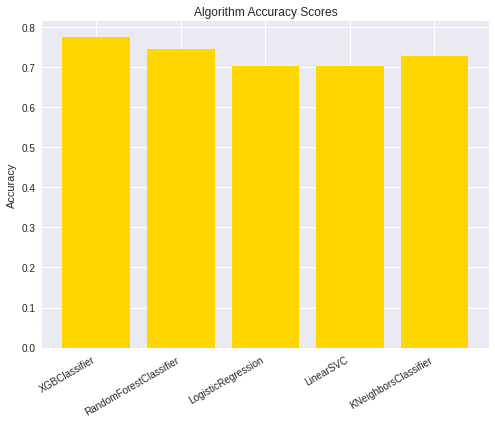

In [62]:
algo_score = list(zip(algo, score))
plt.style.use(['seaborn'])
plt.figure(figsize= (8,6))
plt.bar(range(0,5), score, color='gold')
plt.title('Algorithm Accuracy Scores')
plt.ylabel('Accuracy')
plt.xticks([0,1,2,3,4], algo, rotation=30, ha='right');

In [63]:
algo_df = pd.DataFrame(algo_score,columns =['model','accuracy'])
algo_desc = algo_df.sort_values(by='accuracy', ascending=False)
algo_desc

,model,accuracy
0,XGBClassifier,0.775365
1,RandomForestClassifier,0.745808
4,KNeighborsClassifier,0.728315
2,LogisticRegression,0.703583
3,LinearSVC,0.702618


### **Summary**

"Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance."

We experimented with five (5) different machine learning classification models to determine which features are the most important. We eventually chose XGB Classifier as it had the highest accuracy (77.54%). We focused on accuracy as our primary performance metric.

The models we explored in descending order of accuracy are: 

XGBClassifier - 77.53%, 
RandomForestClassifier - 74.84%, 
KNeighborsClassifier - 72.83%,
LogisticRegression - 70.35%,
LinearSVC	- 70.26%.

In [64]:
importance

,importance,feature
8,0.189003,city_King's Landing
6,0.171485,avg_rating_by_driver
10,0.151462,phone_Android
3,0.118543,surge_pct
12,0.110427,ultimate_black_user_False
4,0.109025,weekday_pct
7,0.052969,city_Astapor
1,0.035038,avg_rating_of_driver
0,0.023092,trips_in_first_30_days
2,0.022166,avg_surge


## C. Insights

"Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice)."

Ultimate can leverage insights of this work by performing cost-benefit analysis on the 'important' variables which Ultimate can control. For example, the most 'important' feature in the analysis is the user being registered to the city 'King's Landing', so the natural intuition would be to emphasize the companies' strengths and increase geo-specific targeted marketing to that area. Marketing could consider running a geo-specific promotion for "Ride Like A King" with an immediate discount on the first ride for a new sign-up in King's Landing.

The second most important feature in our analysis is 'avg_rating_by_driver' which is something that may not be directly actionable, as driver rating of a passenger is a complex function of many other qualitative variables and the company may value the subjectivity of this metric. However, that may be worth surveying some driver-partners to analyze how they think about these ratings.

The third most important feature to predict user retention is Android Phone usage. I'd recommend that marketing could consider targeted ads towards attracting more Android Phone users to Ultimate. Perhaps offer an Android only incentive with an A/B test.

I'd recommend an in-depth cost-benefit analysis for implementing various market strategies related to the more important features related to long-term user retention. 

---
#**APPENDIX: Metadata**
---


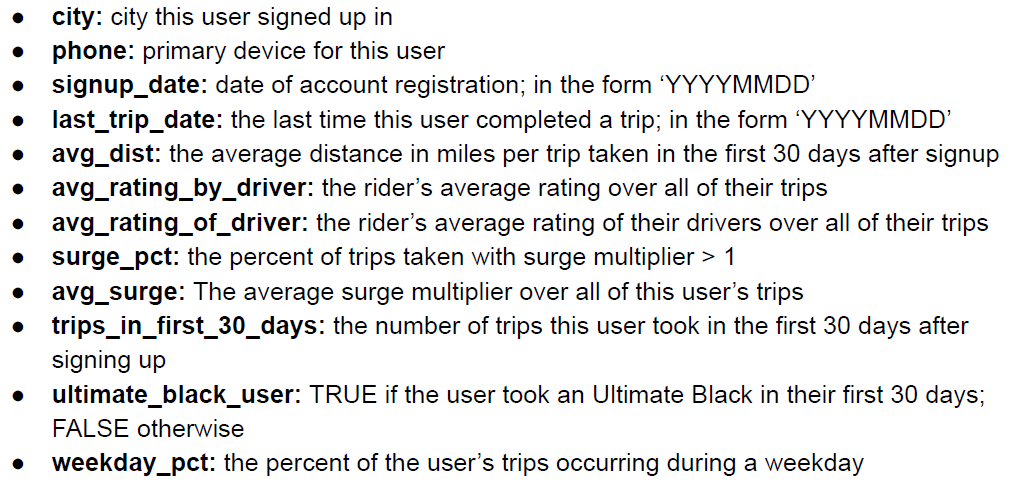
